# Simple neural network

Below we construct a very simple example of a neural network. Our network will solve the basic statistical task: the task of matching the linear regression line to the data.

The first step we take is to import the necessary classes from the Pythonian _Scikit Learn_ module and other necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

Next we generate the data. Of course, if we are dealing with a linear regression model, we generate a linear-like data. In fact, our data meet the assumptions made for performing a linear regression modeling: the relation between the dependent variable _y_ and the independent variable _x_ is linear, and there is an additional random influence on the dependent variable.

In [2]:
def generate_data(slope, n, standard_deviation):
    #draw at random n numbers out of the set {0, 1 ,..., 2*n-1} (without repetitions):
    x = np.random.choice(2*n, n, replace=False) 
    e = np.random.randn(n) * standard_deviation
    y = (x*slope + e)
    return x, y

np.random.seed(27)
number = 50 #data size parameter
x, y = generate_data(2.5, number, 10)

generated_data = pd.DataFrame({'feature': x, 'value': y})

Let us see our data.

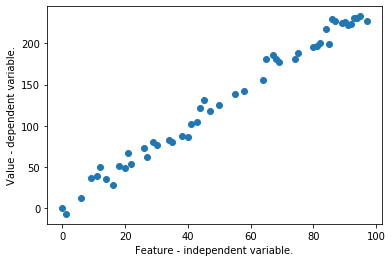

In [3]:
plt.scatter(generated_data.feature, generated_data.value)
plt.xlabel("Feature - independent variable.")
plt.ylabel("Value - dependent variable.")
plt.show()

We fit the linear regression model and draw the best fitted line. We are fitting the line using the `LinearRegression` class taken from Pythonian _Scikit Learn_ library. We are using it in a frame of `fit_linear_regression_model` function that returns a small _json_. Later we will see if we are able to reconstruct its contence (weight, bias and mean square error) be means of neural networks.

In [4]:
def fit_linear_regression_model(data, x_cols, y_cols):
    model = LinearRegression()
    x = data.loc[:, x_cols].values
    y = data[y_cols].values
    model.fit(x, y)
    y_hat = (np.dot(model.coef_, x.T) + model.intercept_)
    mse = mean_squared_error(y, y_hat)
    return {
        'weight': model.coef_[0],
        'bias': model.intercept_,
        'mse': mse
    }

regression_model = fit_linear_regression_model(generated_data, ['feature'], 'value')

Let us look at the values of our _json_ (dictionary) `regression_model`:

In [5]:
regression_model

{'weight': 2.4484971440931442,
 'bias': 3.9320232835498814,
 'mse': 73.74287665166942}

Let's draw our data together with the regression line.

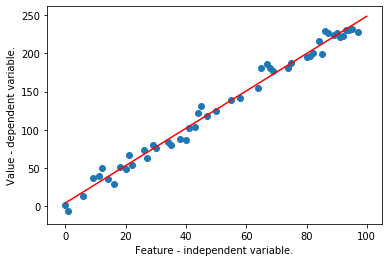

In [6]:
x = np.linspace(0,2*number,1000)
y = x*regression_model['weight'] + regression_model['bias']
plt.plot(x, y, 'r-')
plt.scatter(generated_data.feature, generated_data.value)
plt.xlabel("Feature - independent variable.")
plt.ylabel("Value - dependent variable.")
plt.show()

The basic notion here is the _neuron_. For us, the neuron means simply a linear function, with the slope `=weight` and the intercept `=bias`, as defined below:

In [7]:
def get_neuron_value(x, weight, bias):
    return x * weight + bias

In neural network approach we do not calculate the slope and the intercept directly, e.g. by means of the normal equation, how it is done using the classical least squares approach for the linear regression. Instead, we pick some arbitrary initial intercept and slope, and next judge (and consequently - change) these values by means of the loss function - here the loss function is equal to the square of the distance between the prediction given by the neuron `y_hat` and the value `y`. As we operate on vectors, we calculate the mean of those squares:

In [8]:
def calculate_mean_square_error_loss(y_hat, y):
    return np.mean(np.power(y_hat - y, 2))

Consequently, we may calculate MSE for our given pair: `generated_data` and the neuron, defined by `weight` and `bias`. We achieve it by composing the function `get_neuron_value` and the function `compute_mean_square_error_loss`:

In [9]:
def mse(x, y, weight, bias):
    y_hat = get_neuron_value(x, weight, bias)
    return calculate_mean_square_error_loss(y_hat, y)

We will use this idea to train our network (consited of one neuron) in order to fit do given data. Training means changing, and we are going to change `weight` and `bias` in such a way that minimalize the loss function (square mean error). In order to achieve it, we will _move_ `weight` and `bias` values in the direction computed as the mean gradient of mean square error function. This direction may be calculated as follows:

In [10]:
def get_change_direction(y_hat, x, y):
    delta_weight, delta_bias = np.mean(2*(y_hat - y)*x), np.mean(2*(y_hat - y))
    return delta_weight, delta_bias

After calculating the direction of change, we may update `weight` and `bias`, using the _learning rate_ `alpha` in order to rescale the direction vector:

In [11]:
def update_parameters(weight, bias, alpha, delta_weight, delta_bias):
    new_weight = weight - alpha * delta_weight
    new_bias = bias - alpha * delta_bias
    return new_weight, new_bias

Now we may gather everything together and define a function that will iteratively fit `weight` and `bias` in order to find such ones that minimalize the loss function.

In [12]:
def train(x, y, weight, bias, alpha, epochs):
    new_weight, new_bias = weight, bias
    
    for e in range(epochs): 
        y_hat = get_neuron_value(x, new_weight, new_bias)
        delta_weight, delta_bias = get_change_direction(y_hat, x, y)
        new_weight, new_bias = update_parameters(new_weight, new_bias, alpha, delta_weight, delta_bias)
        if e % (epochs / 20) == 0:
            loss = calculate_mean_square_error_loss(y_hat, y)
            print(f'Cost after {e} epochs is: {loss}')
            
    result_weight, result_bias = new_weight, new_bias
    
    return result_weight, result_bias

We may start to train our one-neuron network. Let us see if we may recover the values obtained at `regression_model`.

In [13]:
train(generated_data.feature, generated_data.value, 0.5, 0.5, alpha=0.0001, epochs=50000)

Cost after 0 epochs is: 14491.12625058344
Cost after 2500 epochs is: 76.00614833202593
Cost after 5000 epochs is: 75.50347785475617
Cost after 7500 epochs is: 75.1124500101017
Cost after 10000 epochs is: 74.808269076052
Cost after 12500 epochs is: 74.57164643675861
Cost after 15000 epochs is: 74.38757745951952
Cost after 17500 epochs is: 74.24439002621624
Cost after 20000 epochs is: 74.13300438500995
Cost after 22500 epochs is: 74.04635738826777
Cost after 25000 epochs is: 73.97895460669629
Cost after 27500 epochs is: 73.92652191849704
Cost after 30000 epochs is: 73.88573448023865
Cost after 32500 epochs is: 73.85400589303818
Cost after 35000 epochs is: 73.82932419473288
Cost after 37500 epochs is: 73.8101242780337
Cost after 40000 epochs is: 73.79518864448461
Cost after 42500 epochs is: 73.78357020087329
Cost after 45000 epochs is: 73.77453220248466
Cost after 47500 epochs is: 73.76750153490079


(2.4524739047840605, 3.655877873863684)

We see that we are very close to the values of `regression_model` - we may be even closer provided we would use more epochs for training. However it seems strage that we need them so many! In order to reduce the number of epochs needed to train the model, we should normalize the data. But it is the topic for another story...